In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mlt
from collections import Counter
from collections import defaultdict
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [4]:
train = pd.read_csv('C:/Users/Admin/Desktop/Magistrale/Primo anno/Secondo semestre/DM2/UCI HAR Dataset/csv_files/train.csv')
test = pd.read_csv('C:/Users/Admin/Desktop/Magistrale/Primo anno/Secondo semestre/DM2/UCI HAR Dataset/csv_files/test.csv')

In [3]:
train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,2,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,2,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30,2,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30,2,WALKING_UPSTAIRS


In [4]:
test

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,5,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,5,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,5,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784,24,2,WALKING_UPSTAIRS
2943,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412,24,2,WALKING_UPSTAIRS
2944,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184,24,2,WALKING_UPSTAIRS
2945,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563,24,2,WALKING_UPSTAIRS


In [5]:
# classe = {'Activity', 'ActivityName'}
attributes = [col for col in train.columns if col != 'Activity']
attributes.pop()
X_train = train[attributes].values
X_test = test[attributes].values
y_train = train['ActivityName']
y_test = test['ActivityName']

In [6]:
attributes

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X',
 'tBodyAcc-max()-Y',
 'tBodyAcc-max()-Z',
 'tBodyAcc-min()-X',
 'tBodyAcc-min()-Y',
 'tBodyAcc-min()-Z',
 'tBodyAcc-sma()',
 'tBodyAcc-energy()-X',
 'tBodyAcc-energy()-Y',
 'tBodyAcc-energy()-Z',
 'tBodyAcc-iqr()-X',
 'tBodyAcc-iqr()-Y',
 'tBodyAcc-iqr()-Z',
 'tBodyAcc-entropy()-X',
 'tBodyAcc-entropy()-Y',
 'tBodyAcc-entropy()-Z',
 'tBodyAcc-arCoeff()-X,1',
 'tBodyAcc-arCoeff()-X,2',
 'tBodyAcc-arCoeff()-X,3',
 'tBodyAcc-arCoeff()-X,4',
 'tBodyAcc-arCoeff()-Y,1',
 'tBodyAcc-arCoeff()-Y,2',
 'tBodyAcc-arCoeff()-Y,3',
 'tBodyAcc-arCoeff()-Y,4',
 'tBodyAcc-arCoeff()-Z,1',
 'tBodyAcc-arCoeff()-Z,2',
 'tBodyAcc-arCoeff()-Z,3',
 'tBodyAcc-arCoeff()-Z,4',
 'tBodyAcc-correlation()-X,Y',
 'tBodyAcc-correlation()-X,Z',
 'tBodyAcc-correlation()-Y,Z',
 'tGravityAcc-mean()-X',
 'tGravityA

In [7]:
X_train

array([[ 2.8858451e-01, -2.0294171e-02, -1.3290514e-01, ...,
         1.7994061e-01, -5.8626924e-02,  1.0000000e+00],
       [ 2.7841883e-01, -1.6410568e-02, -1.2352019e-01, ...,
         1.8028889e-01, -5.4316717e-02,  1.0000000e+00],
       [ 2.7965306e-01, -1.9467156e-02, -1.1346169e-01, ...,
         1.8063731e-01, -4.9117815e-02,  1.0000000e+00],
       ...,
       [ 2.7338737e-01, -1.7010616e-02, -4.5021828e-02, ...,
         2.4914484e-01,  4.0811188e-02,  3.0000000e+01],
       [ 2.8965416e-01, -1.8843044e-02, -1.5828059e-01, ...,
         2.4643223e-01,  2.5339478e-02,  3.0000000e+01],
       [ 3.5150347e-01, -1.2423118e-02, -2.0386717e-01, ...,
         2.4680852e-01,  3.6694843e-02,  3.0000000e+01]])

In [8]:
X_test

array([[ 2.5717778e-01, -2.3285230e-02, -1.4653762e-02, ...,
         2.7680104e-01, -5.7978304e-02,  2.0000000e+00],
       [ 2.8602671e-01, -1.3163359e-02, -1.1908252e-01, ...,
         2.8134292e-01, -8.3898014e-02,  2.0000000e+00],
       [ 2.7548482e-01, -2.6050420e-02, -1.1815167e-01, ...,
         2.8008303e-01, -7.9346197e-02,  2.0000000e+00],
       ...,
       [ 3.4996609e-01,  3.0077442e-02, -1.1578796e-01, ...,
         2.7447878e-01,  1.8118355e-01,  2.4000000e+01],
       [ 2.3759383e-01,  1.8466870e-02, -9.6498932e-02, ...,
         2.6478161e-01,  1.8756291e-01,  2.4000000e+01],
       [ 1.5362719e-01, -1.8436506e-02, -1.3701846e-01, ...,
         2.6393619e-01,  1.8810340e-01,  2.4000000e+01]])

In [9]:
y_train

0               STANDING
1               STANDING
2               STANDING
3               STANDING
4               STANDING
              ...       
7347    WALKING_UPSTAIRS
7348    WALKING_UPSTAIRS
7349    WALKING_UPSTAIRS
7350    WALKING_UPSTAIRS
7351    WALKING_UPSTAIRS
Name: ActivityName, Length: 7352, dtype: object

In [10]:
y_test

0               STANDING
1               STANDING
2               STANDING
3               STANDING
4               STANDING
              ...       
2942    WALKING_UPSTAIRS
2943    WALKING_UPSTAIRS
2944    WALKING_UPSTAIRS
2945    WALKING_UPSTAIRS
2946    WALKING_UPSTAIRS
Name: ActivityName, Length: 2947, dtype: object

# Classification

In [11]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8720732948761453
F1-score [1.         0.80472103 0.83662478 0.88321884 0.86851628 0.825054  ]
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.85      0.76      0.80       491
          STANDING       0.80      0.88      0.84       532
           WALKING       0.86      0.91      0.88       496
WALKING_DOWNSTAIRS       0.88      0.86      0.87       420
  WALKING_UPSTAIRS       0.84      0.81      0.83       471

          accuracy                           0.87      2947
         macro avg       0.87      0.87      0.87      2947
      weighted avg       0.87      0.87      0.87      2947



In [1]:
from sklearn.neighbors import KNeighborsClassifier

In [6]:
clf = KNeighborsClassifier(n_neighbors=5, weights='uniform')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8096369189005769
F1-score [0.97519084 0.73127753 0.80103359 0.76979072 0.77860697 0.7826087 ]
                    precision    recall  f1-score   support

            LAYING       1.00      0.95      0.98       537
           SITTING       0.80      0.68      0.73       491
          STANDING       0.74      0.87      0.80       532
           WALKING       0.70      0.85      0.77       496
WALKING_DOWNSTAIRS       0.82      0.75      0.78       420
  WALKING_UPSTAIRS       0.85      0.73      0.78       471

          accuracy                           0.81      2947
         macro avg       0.82      0.80      0.81      2947
      weighted avg       0.82      0.81      0.81      2947



In [7]:
clf = KNeighborsClassifier(n_neighbors=1, weights='uniform')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7987784187309128
F1-score [0.97323136 0.69247788 0.76435304 0.78212291 0.78896882 0.77560414]
                    precision    recall  f1-score   support

            LAYING       1.00      0.95      0.97       537
           SITTING       0.76      0.64      0.69       491
          STANDING       0.70      0.84      0.76       532
           WALKING       0.73      0.85      0.78       496
WALKING_DOWNSTAIRS       0.79      0.78      0.79       420
  WALKING_UPSTAIRS       0.85      0.72      0.78       471

          accuracy                           0.80      2947
         macro avg       0.80      0.79      0.80      2947
      weighted avg       0.81      0.80      0.80      2947



In [8]:
clf = KNeighborsClassifier(n_neighbors=3, weights='distance')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8086189345096708
F1-score [0.9722488  0.71947195 0.78933792 0.78787879 0.78518519 0.77904328]
                    precision    recall  f1-score   support

            LAYING       1.00      0.95      0.97       537
           SITTING       0.78      0.67      0.72       491
          STANDING       0.73      0.86      0.79       532
           WALKING       0.72      0.86      0.79       496
WALKING_DOWNSTAIRS       0.82      0.76      0.79       420
  WALKING_UPSTAIRS       0.84      0.73      0.78       471

          accuracy                           0.81      2947
         macro avg       0.81      0.80      0.81      2947
      weighted avg       0.82      0.81      0.81      2947



In [10]:
from sklearn.model_selection import GridSearchCV

In [13]:
parameters = {'n_neighbors': np.arange(1, 10 + 1), 'weights':['uniform', 'distance']}

knn = KNeighborsClassifier()
search = GridSearchCV(knn, parameters)
grid_search = search.fit(X_train, y_train)

In [14]:
print(grid_search.best_params_)

{'n_neighbors': 2, 'weights': 'uniform'}


In [15]:
clf = KNeighborsClassifier(n_neighbors=2, weights='uniform')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8045469969460468
F1-score [0.98295455 0.75801749 0.76356589 0.78200692 0.76847291 0.75154512]
                    precision    recall  f1-score   support

            LAYING       1.00      0.97      0.98       537
           SITTING       0.72      0.79      0.76       491
          STANDING       0.79      0.74      0.76       532
           WALKING       0.68      0.91      0.78       496
WALKING_DOWNSTAIRS       0.80      0.74      0.77       420
  WALKING_UPSTAIRS       0.90      0.65      0.75       471

          accuracy                           0.80      2947
         macro avg       0.82      0.80      0.80      2947
      weighted avg       0.82      0.80      0.80      2947



# DIMENSIONALITY REDUCTION

# Variance Threshold

In [12]:
from sklearn.feature_selection import VarianceThreshold

In [13]:
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_train_sel = sel.fit_transform(X_train)

X_train_sel.shape

(7352, 100)

In [14]:
X_test_sel = sel.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8137088564642009
F1-score [1.         0.7752443  0.816      0.76923077 0.79396985 0.7033195 ]
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.83      0.73      0.78       491
          STANDING       0.77      0.86      0.82       532
           WALKING       0.75      0.79      0.77       496
WALKING_DOWNSTAIRS       0.84      0.75      0.79       420
  WALKING_UPSTAIRS       0.69      0.72      0.70       471

          accuracy                           0.81      2947
         macro avg       0.81      0.81      0.81      2947
      weighted avg       0.82      0.81      0.81      2947



# Univariate Feature Selection

In [3]:
from sklearn.feature_selection import SelectKBest

In [4]:
sel = SelectKBest(k=185)
X_train_sel = sel.fit_transform(X_train, y_train)

X_train_sel.shape

NameError: name 'X_train' is not defined

In [1]:
X_train_sel

NameError: name 'X_train_sel' is not defined

In [215]:

X_test_sel = sel.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8618934509670851
F1-score [1.         0.8111588  0.84201077 0.84291188 0.85678392 0.80299786]
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.86      0.77      0.81       491
          STANDING       0.81      0.88      0.84       532
           WALKING       0.80      0.89      0.84       496
WALKING_DOWNSTAIRS       0.91      0.81      0.86       420
  WALKING_UPSTAIRS       0.81      0.80      0.80       471

          accuracy                           0.86      2947
         macro avg       0.86      0.86      0.86      2947
      weighted avg       0.86      0.86      0.86      2947



# Recursive Feature Elimination

In [18]:
from sklearn.feature_selection import SelectFromModel

In [19]:
eli = SelectFromModel(DecisionTreeClassifier())
X_train_eli = eli.fit_transform(X_train, y_train)
X_train_eli.shape

(7352, 32)

In [20]:
X_test_eli = eli.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_eli, y_train)

y_pred = clf.predict(X_test_eli)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8622327790973872
F1-score [1.         0.79328437 0.81976212 0.89140699 0.84634761 0.80347448]
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.82      0.77      0.79       491
          STANDING       0.80      0.84      0.82       532
           WALKING       0.84      0.95      0.89       496
WALKING_DOWNSTAIRS       0.90      0.80      0.85       420
  WALKING_UPSTAIRS       0.82      0.79      0.80       471

          accuracy                           0.86      2947
         macro avg       0.86      0.86      0.86      2947
      weighted avg       0.86      0.86      0.86      2947



# Principal Component Analysis

In [21]:
from sklearn.decomposition import PCA

In [128]:
pca = PCA(n_components=11)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)

In [129]:
X_train_pca.shape

(7352, 11)

In [130]:
c_train = train['Activity']
c_train

0       5
1       5
2       5
3       5
4       5
       ..
7347    2
7348    2
7349    2
7350    2
7351    2
Name: Activity, Length: 7352, dtype: int64

In [131]:
X_train_pca

array([[ 15.7272239 ,  -7.24625881,  -0.46558936, ...,   0.52327289,
         -1.13884904,  -0.36195339],
       [ 15.72331695,  -7.26069038,  -0.25900216, ...,  -0.9191376 ,
         -0.44884904,  -0.89230043],
       [ 15.74256958,  -7.20400561,   0.10648337, ...,  -0.01794846,
          0.05328351,  -0.21370427],
       ...,
       [-11.94056734,   7.18589795,  -2.93842939, ...,  -0.1033348 ,
          0.23847979,   1.24613683],
       [-11.99060681,   6.75288146,  -3.28364137, ...,  -0.04040271,
          0.76741178,   1.68115782],
       [-11.96428852,   6.82458383,  -2.65513553, ...,  -0.76277779,
          1.0061489 ,   0.18417284]])

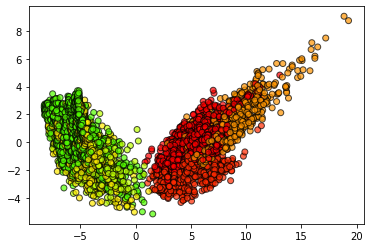

In [132]:
plt.scatter(X_train_pca[:, 1], X_train_pca[:, 2], c= c_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [133]:
X_test_pca = pca.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_pca, y_train)

y_pred = clf.predict(X_test_pca)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8011537156430268
F1-score [0.97050428 0.68152866 0.75465013 0.81843318 0.75810474 0.80451977]
                    precision    recall  f1-score   support

            LAYING       0.99      0.95      0.97       537
           SITTING       0.71      0.65      0.68       491
          STANDING       0.71      0.80      0.75       532
           WALKING       0.75      0.90      0.82       496
WALKING_DOWNSTAIRS       0.80      0.72      0.76       420
  WALKING_UPSTAIRS       0.86      0.76      0.80       471

          accuracy                           0.80      2947
         macro avg       0.80      0.80      0.80      2947
      weighted avg       0.81      0.80      0.80      2947



In [127]:
# file1 = open("C:/Users/Admin/Desktop/Magistrale/Primo anno/Secondo semestre/DM2/UCI HAR Dataset/csv_files/train.csv", "a")

#file2 = open("C:/Users/Admin/Desktop/Magistrale/Primo anno/Secondo semestre/DM2/UCI HAR Dataset/csv_files/test.csv", "r")


#for line in file2:

#   file1.write(line)


#file1.close()

# file2.close()

In [ ]:
# file1

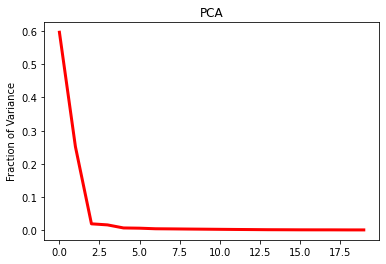

In [257]:
plt.plot(PCA(n_components=20).fit(X_train).explained_variance_ratio_, lw=3, color='r', ms=2)
plt.title("PCA")
plt.ylabel("Fraction of Variance")
plt.show()

In [ ]:
plt.plot(PCA(n_components=10).fit(X_test).explained_variance_ratio_, lw=3, color='r', ms=2)
plt.title("PCA")
plt.ylabel("Fraction of Variance")
plt.show()

# Random Subspace Projection

In [138]:
from sklearn import random_projection

In [260]:
rsp = random_projection.GaussianRandomProjection(n_components='auto', eps=0.99)
X_train_rsp = rsp.fit_transform(X_train)
X_train_rsp.shape

(7352, 213)

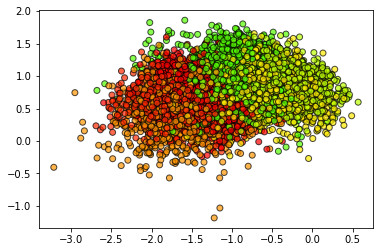

In [172]:
plt.scatter(X_train_rsp[:, 0], X_train_rsp[:, 1], c=train["Activity"], cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [261]:
X_test_rsp = rsp.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_rsp, y_train)

y_pred = clf.predict(X_test_rsp)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7400746521886664
F1-score [0.96998124 0.67334669 0.71639042 0.71494042 0.62482947 0.69565217]
                    precision    recall  f1-score   support

            LAYING       0.98      0.96      0.97       537
           SITTING       0.66      0.68      0.67       491
          STANDING       0.70      0.73      0.72       532
           WALKING       0.66      0.79      0.71       496
WALKING_DOWNSTAIRS       0.73      0.55      0.62       420
  WALKING_UPSTAIRS       0.71      0.68      0.70       471

          accuracy                           0.74      2947
         macro avg       0.74      0.73      0.73      2947
      weighted avg       0.74      0.74      0.74      2947



# Multi Dimensional Scaling

In [174]:
from sklearn.manifold import MDS

In [262]:
mds = MDS(n_components=2)
X_train_mds = mds.fit_transform(X_train)
X_train_mds.shape

KeyboardInterrupt: 

In [ ]:
plt.scatter(X_train_mds[:, 0], X_train_mds[:, 1], c=train["Activity"], cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [ ]:
#X_test_mds = mds.transform(X_test) # no transform

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_mds, y_train)

y_pred = clf.predict(X_train_mds)

print('Accuracy %s' % accuracy_score(y_train, y_pred))
print('F1-score %s' % f1_score(y_train, y_pred, average=None))
print(classification_report(y_train, y_pred))

# IsoMap

In [178]:
from sklearn.manifold import Isomap

In [179]:
iso = Isomap(n_components=2)
X_train_iso = iso.fit_transform(X_train)
X_train_iso.shape

(7352, 2)

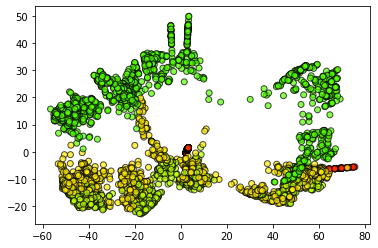

In [180]:
plt.scatter(X_train_iso[:, 0], X_train_iso[:, 1], c=c_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [184]:
X_test_iso = mds.transform(X_test) # non ha transform come funzione

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_iso, y_train)

y_pred = clf.predict(X_test_iso)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))


AttributeError: 'MDS' object has no attribute 'transform'

In [ ]:
X_test_pca = pca.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_pca, y_train)

y_pred = clf.predict(X_test_pca)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

# t-SNE

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(n_components=2)
X_train_tsne = tsne.fit_transform(X_train)
X_train_tsne.shape

In [ ]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=c_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [ ]:
X_test_tsne = TSNE(verbose=2, perplexity=2).fit_transform(X_test)
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_tsne, y_train)

y_pred = clf.predict(X_test_tsne)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))


In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')
        
        # prepare the data for seaborn         
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, height=8,\
                   palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')

In [ ]:
X_pre_tsne = train.drop(['subject', 'Activity','ActivityName'], axis=1)
y_pre_tsne = train['ActivityName']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[2,5,10,20,50])

# IMBALANCED LEARNING

In [185]:
from collections import Counter
from collections import defaultdict
import seaborn as sns
from imblearn.datasets import make_imbalance

In [186]:
def ratio_func(y, multiplier, minority_class):
    target_stats = Counter(y)
    return {minority_class: int(multiplier * target_stats[minority_class])}

In [190]:
X_resampled_train, y_resampled_train = make_imbalance(
        X_train,
        y_train,
        sampling_strategy=ratio_func,
        **{"multiplier": 0.1, "minority_class": "STANDING", "minority_class": "LAYING","minority_class": "SITTING"},
    )

In [192]:
X_resampled_test, y_resampled_test = make_imbalance(
        X_test,
        y_test,
        sampling_strategy=ratio_func,
        **{"multiplier": 0.1, "minority_class": "STANDING", "minority_class": "LAYING","minority_class": "SITTING"},
    )

In [193]:
len(X_resampled_train)

6194

In [194]:
len(X_train)

7352

In [195]:
len(y_resampled_train)

6194

In [196]:
len(y_train)

7352

In [197]:
len(X_resampled_test)

2505

In [198]:
len(X_test)

2947

# Undersampling

In [199]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour

## Random Undersampler

In [200]:
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_resampled_train, y_resampled_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({'LAYING': 128, 'SITTING': 128, 'STANDING': 128, 'WALKING': 128, 'WALKING_DOWNSTAIRS': 128, 'WALKING_UPSTAIRS': 128})


In [216]:
sel = SelectKBest(k=185)
X_train_sel = sel.fit_transform(X_res, y_res)

X_train_sel.shape
X_test_sel = sel.transform(X_resampled_test)

In [217]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_resampled_test)

print('Accuracy %s' % accuracy_score(y_resampled_test, y_pred))
print('F1-score %s' % f1_score(y_resampled_test, y_pred, average=None))
print(classification_report(y_resampled_test, y_pred))


Accuracy 0.8526946107784431
F1-score [0.99906803 0.49717514 0.90964467 0.85025126 0.78839178 0.75341028]
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.34      0.90      0.50        49
          STANDING       0.99      0.84      0.91       532
           WALKING       0.85      0.85      0.85       496
WALKING_DOWNSTAIRS       0.80      0.78      0.79       420
  WALKING_UPSTAIRS       0.74      0.76      0.75       471

          accuracy                           0.85      2505
         macro avg       0.79      0.85      0.80      2505
      weighted avg       0.87      0.85      0.86      2505



In [218]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_sel, y_res)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_resampled_test, y_pred))
print('F1-score %s' % f1_score(y_resampled_test, y_pred, average=None))
print(classification_report(y_resampled_test, y_pred))

Accuracy 0.8019960079840319
F1-score [0.99906803 0.44565217 0.88888889 0.78682525 0.68025478 0.67109635]
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.30      0.84      0.45        49
          STANDING       0.98      0.81      0.89       532
           WALKING       0.72      0.87      0.79       496
WALKING_DOWNSTAIRS       0.73      0.64      0.68       420
  WALKING_UPSTAIRS       0.70      0.64      0.67       471

          accuracy                           0.80      2505
         macro avg       0.74      0.80      0.75      2505
      weighted avg       0.83      0.80      0.81      2505



## CondensedNearestNeighbour

In [219]:
import warnings
warnings.simplefilter("ignore")

In [220]:
cnn = CondensedNearestNeighbour(random_state=42, n_jobs=10)
X_res, y_res = cnn.fit_resample(X_resampled_train, y_resampled_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({'STANDING': 201, 'SITTING': 128, 'LAYING': 59, 'WALKING': 5, 'WALKING_DOWNSTAIRS': 5, 'WALKING_UPSTAIRS': 5})


In [221]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_resampled_test)

print('Accuracy %s' % accuracy_score(y_resampled_test, y_pred))
print('F1-score %s' % f1_score(y_resampled_test, y_pred, average=None))
print(classification_report(y_resampled_test, y_pred))

Accuracy 0.6063872255489022
F1-score [0.94433781 0.20942408 0.84022556 0.43968433 0.48140496 0.33583208]
                    precision    recall  f1-score   support

            LAYING       0.97      0.92      0.94       537
           SITTING       0.12      0.82      0.21        49
          STANDING       0.84      0.84      0.84       532
           WALKING       0.50      0.39      0.44       496
WALKING_DOWNSTAIRS       0.43      0.55      0.48       420
  WALKING_UPSTAIRS       0.57      0.24      0.34       471

          accuracy                           0.61      2505
         macro avg       0.57      0.63      0.54      2505
      weighted avg       0.67      0.61      0.62      2505



In [224]:
sel = SelectKBest(k=185)
X_train_sel = sel.fit_transform(X_res, y_res)

X_train_sel.shape
X_test_sel = sel.transform(X_resampled_test)

In [225]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_sel, y_res)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_resampled_test, y_pred))
print('F1-score %s' % f1_score(y_resampled_test, y_pred, average=None))
print(classification_report(y_resampled_test, y_pred))

Accuracy 0.6479041916167665
F1-score [0.99906803 0.21212121 0.9212828  0.44097996 0.50454087 0.37735849]
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.12      0.71      0.21        49
          STANDING       0.95      0.89      0.92       532
           WALKING       0.49      0.40      0.44       496
WALKING_DOWNSTAIRS       0.44      0.60      0.50       420
  WALKING_UPSTAIRS       0.60      0.28      0.38       471

          accuracy                           0.65      2505
         macro avg       0.60      0.65      0.58      2505
      weighted avg       0.70      0.65      0.66      2505



# OVERSAMPLING

In [226]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

### RandomOverSampler

In [227]:
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_resampled_train, y_resampled_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({'LAYING': 1407, 'SITTING': 1407, 'STANDING': 1407, 'WALKING': 1407, 'WALKING_DOWNSTAIRS': 1407, 'WALKING_UPSTAIRS': 1407})


In [231]:
sel = SelectKBest(k=185)
X_train_sel = sel.fit_transform(X_res, y_res)

X_train_sel.shape
X_test_sel = sel.transform(X_resampled_test)

In [232]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_resampled_test)

print('Accuracy %s' % accuracy_score(y_resampled_test, y_pred))
print('F1-score %s' % f1_score(y_resampled_test, y_pred, average=None))
print(classification_report(y_resampled_test, y_pred))

Accuracy 0.8646706586826347
F1-score [1.         0.57894737 0.95419847 0.85504587 0.79496855 0.7064117 ]
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.51      0.67      0.58        49
          STANDING       0.97      0.94      0.95       532
           WALKING       0.78      0.94      0.86       496
WALKING_DOWNSTAIRS       0.84      0.75      0.79       420
  WALKING_UPSTAIRS       0.75      0.67      0.71       471

          accuracy                           0.86      2505
         macro avg       0.81      0.83      0.81      2505
      weighted avg       0.87      0.86      0.86      2505



In [233]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_sel, y_res)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_resampled_test, y_pred))
print('F1-score %s' % f1_score(y_resampled_test, y_pred, average=None))
print(classification_report(y_resampled_test, y_pred))

Accuracy 0.884630738522954
F1-score [1.         0.61538462 0.95393474 0.85154062 0.84644195 0.77569061]
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.53      0.73      0.62        49
          STANDING       0.97      0.93      0.95       532
           WALKING       0.79      0.92      0.85       496
WALKING_DOWNSTAIRS       0.89      0.81      0.85       420
  WALKING_UPSTAIRS       0.81      0.75      0.78       471

          accuracy                           0.88      2505
         macro avg       0.83      0.86      0.84      2505
      weighted avg       0.89      0.88      0.89      2505



### SMOTE

In [234]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_resampled_train, y_resampled_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({'LAYING': 1407, 'SITTING': 1407, 'STANDING': 1407, 'WALKING': 1407, 'WALKING_DOWNSTAIRS': 1407, 'WALKING_UPSTAIRS': 1407})


In [235]:
sel = SelectKBest(k=185)
X_train_sel = sel.fit_transform(X_res, y_res)

X_train_sel.shape
X_test_sel = sel.transform(X_resampled_test)

In [236]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_resampled_test)

print('Accuracy %s' % accuracy_score(y_resampled_test, y_pred))
print('F1-score %s' % f1_score(y_resampled_test, y_pred, average=None))
print(classification_report(y_resampled_test, y_pred))

Accuracy 0.8734530938123752
F1-score [1.         0.60504202 0.95493768 0.87065637 0.76982097 0.76359833]
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.51      0.73      0.61        49
          STANDING       0.97      0.94      0.95       532
           WALKING       0.84      0.91      0.87       496
WALKING_DOWNSTAIRS       0.83      0.72      0.77       420
  WALKING_UPSTAIRS       0.75      0.77      0.76       471

          accuracy                           0.87      2505
         macro avg       0.82      0.85      0.83      2505
      weighted avg       0.88      0.87      0.87      2505



In [237]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_sel, y_res)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_resampled_test, y_pred))
print('F1-score %s' % f1_score(y_resampled_test, y_pred, average=None))
print(classification_report(y_resampled_test, y_pred))

Accuracy 0.8694610778443114
F1-score [1.         0.51798561 0.93450635 0.82297552 0.84102564 0.77682403]
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.40      0.73      0.52        49
          STANDING       0.97      0.90      0.93       532
           WALKING       0.77      0.88      0.82       496
WALKING_DOWNSTAIRS       0.91      0.78      0.84       420
  WALKING_UPSTAIRS       0.79      0.77      0.78       471

          accuracy                           0.87      2505
         macro avg       0.81      0.84      0.82      2505
      weighted avg       0.88      0.87      0.87      2505



### Class Weight

In [238]:
new_y_test = y_resampled_test.replace({"WALKING": 1, "WALKING_UPSTAIRS": 1, "WALKING_DOWNSTAIRS": 1, "LAYING": 0, "SITTING": 0, "STANDING": 0})
new_y_train = y_resampled_train.replace({"WALKING": 1, "WALKING_UPSTAIRS": 1, "WALKING_DOWNSTAIRS": 1, "LAYING": 0, "SITTING": 0, "STANDING": 0})
new_y_train

0       0
1       0
2       0
3       0
4       0
       ..
6189    1
6190    1
6191    1
6192    1
6193    1
Name: ActivityName, Length: 6194, dtype: int64

Accuracy 1.0
F1-score [1. 1.]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1118
           1       1.00      1.00      1.00      1387

    accuracy                           1.00      2505
   macro avg       1.00      1.00      1.00      2505
weighted avg       1.00      1.00      1.00      2505



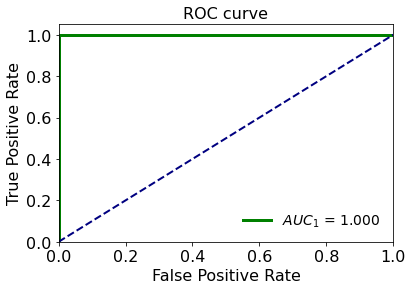

In [239]:
clf = DecisionTreeClassifier(min_samples_leaf=3, 
                             class_weight={0:1, 1: 5}, random_state=42)
clf.fit(X_resampled_train, new_y_train)

y_pred = clf.predict(X_resampled_test)

print('Accuracy %s' % accuracy_score(new_y_test, y_pred))
print('F1-score %s' % f1_score(new_y_test, y_pred, average=None))
print(classification_report(new_y_test, y_pred))

y_score = clf.predict_proba(X_resampled_test)
fpr, tpr, _ = roc_curve(new_y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

#plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

# OUTLIER DETECTION

In [240]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from collections import defaultdict

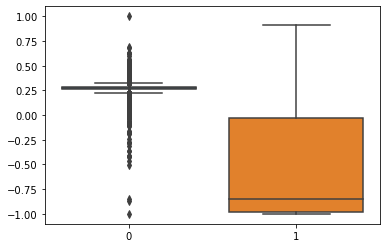

In [241]:
idx0 = 0
idx1 = 4

sns.boxplot(data=[X_train[:,idx0], X_train[:,idx1]])
plt.xticks([0,1])
plt.show()

## DBSCAN

In [242]:
from sklearn.cluster import DBSCAN

In [243]:
dbscan = DBSCAN(eps=5, min_samples=10)
dbscan.fit(X_train)

DBSCAN(eps=5, min_samples=10)

In [244]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5], dtype=int64),
 array([ 303, 3906,  880,    8,  159, 1094, 1002], dtype=int64))

In [245]:
train.loc[np.where(dbscan.labels_==-1)]

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
27,0.144504,0.189263,0.062769,-0.904300,-0.181937,-0.443151,-0.901100,-0.110813,-0.400599,-0.931896,...,0.013526,0.043354,0.021485,0.046689,-0.667085,0.054216,-0.218875,1,4,SITTING
30,0.221847,0.034108,-0.123612,-0.814708,-0.749418,-0.571899,-0.878682,-0.776895,-0.700710,-0.737152,...,0.179223,0.077595,0.056348,-0.316727,-0.582806,-0.020756,-0.255270,1,4,SITTING
31,-0.041701,0.175102,0.025552,-0.758393,-0.586537,-0.439110,-0.774118,-0.555350,-0.438736,-0.737152,...,0.114760,0.114436,-0.070782,-0.001461,-0.552939,-0.053539,-0.260424,1,4,SITTING
32,0.013904,0.153296,0.016243,-0.808638,-0.572746,-0.626415,-0.806213,-0.533811,-0.579394,-0.916064,...,-0.004913,0.033988,-0.036068,0.205113,-0.418368,-0.142549,-0.305884,1,4,SITTING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7000,-0.088994,0.270256,0.167615,-0.840510,-0.470905,-0.668258,-0.834703,-0.443943,-0.636058,-0.948723,...,0.118589,0.094648,-0.021962,0.026312,-0.661154,0.057936,-0.223915,30,4,SITTING
7001,-0.003060,0.210302,0.036347,-0.797451,-0.362963,-0.553527,-0.783895,-0.272666,-0.479636,-0.887848,...,0.015838,0.063686,0.031717,0.007030,-0.480101,-0.066440,-0.310414,30,4,SITTING
7189,0.281279,0.027026,-0.078728,-0.915616,-0.834043,-0.686235,-0.953192,-0.824257,-0.773325,-0.703837,...,0.061415,0.016246,-0.346680,-0.382527,-0.869831,0.187881,0.010203,30,5,STANDING
7190,0.270349,0.054640,-0.006442,-0.919021,-0.797208,-0.606512,-0.949277,-0.812261,-0.604579,-0.703837,...,0.063645,-0.084797,0.081627,0.623570,-0.894985,0.168664,-0.000578,30,5,STANDING


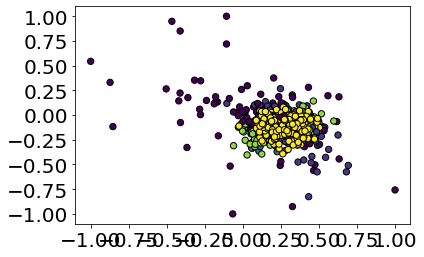

In [246]:
plt.scatter( X_train[:,0], X_train[:,2], s=40, edgecolor='black', c= dbscan.labels_ )

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

## LOF

In [247]:
from sklearn.neighbors import LocalOutlierFactor

In [248]:
clf = LocalOutlierFactor(n_neighbors=2)
outliers = clf.fit_predict(X_train)

In [249]:
clf.negative_outlier_factor_

array([-1.46453682, -1.04104238, -1.03367757, ..., -1.0096179 ,
       -1.0392275 , -1.01309373])

In [250]:
np.unique(outliers, return_counts=True)

(array([-1,  1]), array([  16, 7336], dtype=int64))

In [251]:
np.where(outliers==-1)

(array([ 564,  934, 1667, 1788, 1904, 2937, 3238, 3461, 3646, 4199, 4281,
        4779, 5066, 5644, 5783, 6553], dtype=int64),)

In [252]:
clf.negative_outlier_factor_[np.where(outliers==-1)]

array([-1.89195983, -1.51155723, -1.53313831, -1.56078274, -1.97095703,
       -1.63352335, -1.8560535 , -1.69676646, -1.56114336, -1.51764365,
       -1.75110031, -1.54294361, -2.0285171 , -1.55628319, -1.55985561,
       -1.60506828])

In [253]:
max_val = np.max(clf.negative_outlier_factor_[np.where(outliers==-1)])
max_val

-1.511557226635841

In [254]:
np.min(clf.negative_outlier_factor_[np.where(outliers==-1)])

-2.0285170979676654

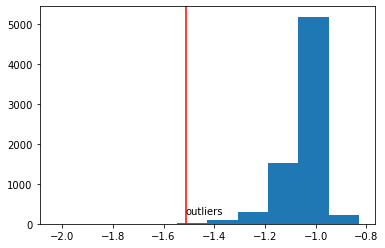

In [255]:
plt.hist(clf.negative_outlier_factor_, bins=10)
plt.axvline(max_val, c='r')
plt.text(max_val, 250, 'outliers')
plt.show()

In [16]:
pip install pyod


     ------------------------------------ 116.4/116.4 KB 965.5 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pyod: filename=pyod-0.9.9-py3-none-any.whl size=139325 sha256=b3c280d84bf5add1eaaac890aa439fed480327af8ad8757bc3bc205047e2a5cc
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\12\26\e9\d46b2360d356003c84269ee2d0d7a1323b790efe868546534c
Successfully built pyod


In [17]:
from pyod.models.abod import ABOD
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.models.loci import LOCI
#from pyod.models.auto_encoder import AutoEncoder

# ABOD

In [18]:
clf = ABOD()
clf.fit(X_train)

ABOD(contamination=0.1, method='fast', n_neighbors=5)

In [19]:
clf.decision_scores_

array([-4.46862040e-05, -2.87194977e-05, -1.87648376e-04, ...,
       -1.75509582e-04, -1.06731382e-04, -5.41070915e-05])

In [22]:
outliers = clf.predict(X_train)
np.unique(outliers, return_counts=True)

(array([0, 1]), array([6271, 1081], dtype=int64))

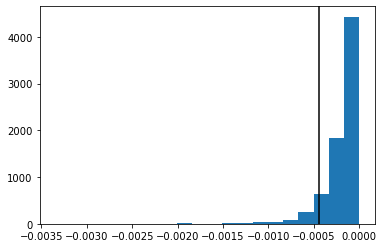

In [23]:
plt.hist(clf.decision_scores_, bins=20)
plt.axvline(np.min(clf.decision_scores_[np.where(outliers==1)]), c='k')
plt.show()

In [24]:
outliers = clf.predict(X_test)
np.unique(outliers, return_counts=True)

(array([0, 1]), array([1688, 1259], dtype=int64))

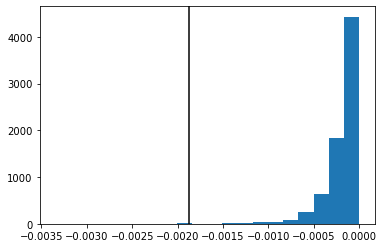

In [25]:
plt.hist(clf.decision_scores_, bins=20)
plt.axvline(np.min(clf.decision_scores_[np.where(outliers==1)]), c='k')
plt.show()

# Isolation Forest

In [38]:
from sklearn.ensemble import IsolationForest

from sklearn.datasets import make_blobs
from numpy import quantile, random, where

In [42]:
model=IsolationForest(n_estimators=100,max_samples='auto',contamination=float(0.2),random_state=42)

model.fit(X_train, y_train)

print(model.get_params())

{'bootstrap': False, 'contamination': 0.2, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [43]:
outliers = model.predict(X_train)
np.unique(outliers, return_counts=True)

(array([-1,  1]), array([1471, 5881], dtype=int64))

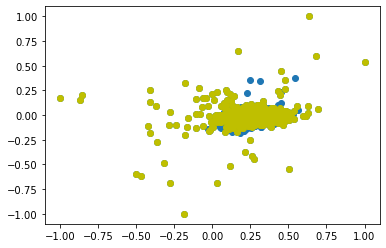

In [44]:
outlier_index = where(outliers==-1)
values = X_train[outlier_index]
 
plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(values[:,0], values[:,1], color='y')
plt.show()

In [45]:
model=IsolationForest(n_estimators=100,max_samples='auto',contamination=float(0.2),random_state=42)

model.fit(X_test, y_test)

print(model.get_params())

{'bootstrap': False, 'contamination': 0.2, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [46]:
outliers = model.predict(X_test)
np.unique(outliers, return_counts=True)

(array([-1,  1]), array([ 590, 2357], dtype=int64))

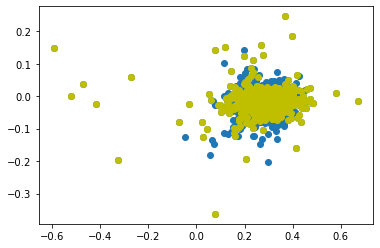

In [47]:
outlier_index = where(outliers==-1)
values = X_test[outlier_index]
 
plt.scatter(X_test[:,0], X_test[:,1])
plt.scatter(values[:,0], values[:,1], color='y')
plt.show()